## **Chapter 3: ANN**
### **Ex2: Medical records for Pima Indians**
- Using ANN to determine whether a person has diabetes or not?
*https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
*(https://www.kaggle.com/kumargh/pimaindiansdiabetescsv)
- This dataset describes the medical records for Pima Indians and whether or not each
- patient will have an onset of diabetes within five years.
- Fields description follow:
- preg = Number of times pregnant
- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- pres = Diastolic blood pressure (mm Hg)
- skin = Triceps skin fold thickness (mm)
- test = 2-Hour serum insulin (mu U/ml)
- mass = Body mass index (weight in kg/(height in m)^2)
- pedi = Diabetes pedigree function
- age = Age (years)
- class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)
# load pima indians dataset
dataset = np.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
dataset[5]

array([  5.   , 116.   ,  74.   ,   0.   ,   0.   ,  25.6  ,   0.201,
        30.   ,   0.   ])

In [ ]:
dataset.size

6912

In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(X, Y, epochs=200,
                    batch_size=32,
                    verbose=0,
                    validation_split=0.3)

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print(scores)

24/24 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7461
[0.5095821022987366, 0.74609375]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


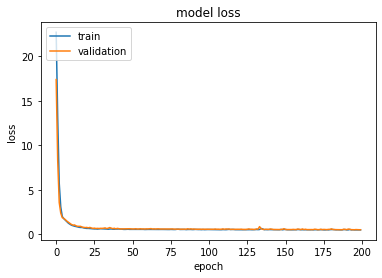

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[:5])

[1, 0, 1, 0, 1]


In [ ]:
X_new= X[0:5, :]
X_new

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [ ]:
y_new = model.predict(X_new)
# round predictions
rounded = [round(x[0]) for x in y_new]
print(rounded)

[1, 0, 1, 0, 1]


In [ ]:
y = Y[0:5]
y

array([1., 0., 1., 0., 1.])